# NLP Spark
* download spark-nlp==2.4.0

In [12]:
!pip install spark-nlp
#!pip install pyspark==2.4.4
#!pip install findspark
#!pip uninstall pyspark==2.4.4

from pyspark.sql import SparkSession
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql.types import *
import pandas as pd


  Using cached spark_nlp-2.4.1-py2.py3-none-any.whl (108 kB)


In [4]:

import findspark
findspark.init()
from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp.embeddings import *

ModuleNotFoundError: No module named 'findspark'

## start SparkSession in your python program manually

In [12]:
# import os
# os.environ.get("PYSPARK_SUBMIT_ARGS", "pyspark-shell")

# import findspark
# findspark.init()

# import pyspark
# print(pyspark.version)
# # import random

#sc = pyspark.SparkContext()
# num_samples = 100000000

# def inside(p):     
#   x, y = random.random(), random.random()
#   return x*x + y*y < 1

# count = sc.parallelize(range(0, num_samples)).filter(inside).count()

# pi = 4 * count / num_samples
# print(pi)

# sc.stop()


# spark = pyspark.sql.SparkSession \
#     .builder \
#     .master('local[4]') \
#     .appName("Python Spark entity/POS relationship") \
#     .config("spark.driver.memory", "6g") \
#     .config("spark.executor.memory", "6g") \
#     .config("spark.jars.packages", "JohnSnowLabs:spark-nlp:2.4.1")\
#     .getOrCreate()

# spark
# spark = SparkSession.builder \
#     .appName("ner")\
#     .master("local")\
#     .config("spark.driver.memory","8G")\
#     .config("spark.driver.maxResultSize", "2G") \
#     .config("spark.jars.packages", "JohnSnowLabs:spark-nlp:2.4.1")\
#     .config("spark.kryoserializer.buffer.max", "500m")\
#     .getOrCreate()


import sparknlp
from sparknlp.pretrained import PretrainedPipeline
spark = sparknlp.start()

print(sparknlp.version())
print(spark.version)

# #download, load, and annotate a text by pre-trained pipeline

pipeline = PretrainedPipeline('recognize_entities_dl', 'en')
result = pipeline.annotate('Harry Potter is a great movie')

2.4.1
2.4.5
recognize_entities_dl download started this may take some time.
Approx size to download 159 MB
[OK!]


In [8]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master('local[4]') \
    .appName('Spark NLP') \
    .config("spark.driver.memory", "6g") \
    .config("spark.executor.memory", "6g") \
    .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.11:2.4.1") \
    .getOrCreate()


In [7]:
spark.stop()
#result
#!pip freeze

In [9]:
#spark.sparkContext.addFile("https://github.com/hamed-abdelhaq/big-data-demos/tree/master/data/spark_nlp_dataset.parquet")
df = spark.read.parquet("C:\\Users\\hamedabdelhaq\\IdeaProjects\\big-data-course\\spark-projects\\data\\spark_nlp_dataset.parquet")
#df = spark.read.load("https://github.com/hamed-abdelhaq/big-data-demos/tree/master/data/spark_nlp_dataset.parquet")

In [10]:
df.show()

+--------------------+
|                text|
+--------------------+
|Reuters historica...|
|Following are som...|
|1714 - The Treaty...|
|1812 - Russian ar...|
|Napoleon entered ...|
|1822 - Brazil pro...|
|As Liberal prime ...|
|1860 - Giuseppe G...|
|1901 - In China ,...|
|1909 - Elia Kazan...|
|1913 - Sir Anthon...|
|He succeeded to t...|
|1969 - Scottish m...|
|Four years later ...|
|1986 - Bishop Des...|
|He was the first ...|
|1990 - The United...|
|He won acclaim fo...|
|1993 - Six former...|
|1994 - The Stars ...|
+--------------------+
only showing top 20 rows



In [13]:
from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp.embeddings import *
documentAssembler = DocumentAssembler().setInputCol("text").setOutputCol("document")

sentenceDetector = SentenceDetector() \
.setInputCols(["document"])\
.setOutputCol("sentence")

tokenizer = Tokenizer() \
    .setInputCols(["sentence"]) \
    .setOutputCol("token")


word_emb_glove = WordEmbeddingsModel.pretrained("glove_100d", lang="en")
per_pos_model = PerceptronModel.pretrained("pos_anc", lang="en")
ner_with_glove = NerCrfModel.pretrained("ner_crf", lang="en")


glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
pos_anc download started this may take some time.
Approximate size to download 4.3 MB
[OK!]
ner_crf download started this may take some time.
Approximate size to download 10.1 MB
[OK!]


In [7]:
recursivePipeline = RecursivePipeline(stages=[
        documentAssembler,
        sentenceDetector, 
        tokenizer,
        word_emb_glove,
        per_pos_model,
        ner_with_glove
])
fitted_model = recursivePipeline.fit(df)
df_with_annotations = fitted_model.transform(df)
df_with_annotations.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|          embeddings|                 pos|                 ner|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Reuters historica...|[[document, 0, 42...|[[document, 0, 42...|[[token, 0, 6, Re...|[[word_embeddings...|[[pos, 0, 6, NNP,...|[[named_entity, 0...|
|Following are som...|[[document, 0, 82...|[[document, 0, 82...|[[token, 0, 8, Fo...|[[word_embeddings...|[[pos, 0, 8, VBG,...|[[named_entity, 0...|
|1714 - The Treaty...|[[document, 0, 12...|[[document, 0, 12...|[[token, 0, 3, 17...|[[word_embeddings...|[[pos, 0, 3, CD, ...|[[named_entity, 0...|
|1812 - Russian ar...|[[document, 0, 13...|[[document, 0, 13...|[[token, 0, 3, 18...|[[word_embeddings...|

In [8]:
#df_with_annotations.select("ner", "pos").show()

from pyspark.sql.functions import col

from pyspark.sql.functions import explode
from pyspark.sql.functions import countDistinct, avg, stddev


df_ner = df_with_annotations.select(explode("ner").alias("nerE")).select(col("nerE.result").alias("NERresult"))
#df_ner.show()
df_pos = df_with_annotations.select(explode("pos").alias("posE")).select(col("posE.result").alias("POSresult"))
#print(df_pos.count(),df_ner.count())

schema = StructType(df_ner.schema.fields + df_pos.schema.fields)
df1df2 = df_ner.rdd.zip(df_pos.rdd).map(lambda x: x[0]+x[1])
df_result = spark.createDataFrame(df1df2, schema)
#df_result.select(countDistinct("POSresult").alias("Distinct NER")).show()
df_result.groupBy("POSresult", "NERresult").count().orderBy(col("count")).show(100)

NameError: name 'StructType' is not defined

In [65]:
#pd_df_annotated = df_with_annotations.toPandas()
pd_df_annotated.to_csv('ffff.csv')

In [31]:
pos_items = pd_df_annotated.pos.apply(pd.DataFrame).tolist()
ner_items = pd_df_annotated.ner.apply(pd.DataFrame).tolist()


pos_df = pd.concat(pos_items)[[3]]
ner_df = pd.concat(ner_items)[[3]]

result = pd.concat([pos_df, ner_df], axis=1, sort=False)
result.columns = ["POS", "NER"]

result

,POS,NER
0,NNP,I-ORG
1,JJ,O
2,NN,O
3,-,O
4,NNP,O
5,CD,O
6,.,O
0,VBG,O
1,VBP,O
2,DT,O


In [32]:

@pandas_udf("long", PandasUDFType.GROUPED_AGG)
def analyze_POS(sample_pd):
        not_others_count = sample_pd.where(sample_pd!='O').count()
        return not_others_count


schema = StructType([StructField('POS', StringType(), True),
                     StructField('NER', StringType(), True)])

df_res = spark.createDataFrame(result,schema=schema)

agg_result = df_res.groupby('POS').agg(analyze_POS(df_res['NER']))
#display(agg_result)

agg_result.show(n=100)

+----+----------------+
| POS|analyze_POS(NER)|
+----+----------------+
| ...|               0|
| JJS|               0|
| JJR|               0|
|PRP$|               0|
| RBR|               0|
| NNS|               3|
| WDT|               0|
|  EX|               0|
|  WP|               0|
|  JJ|             176|
|  FW|               0|
|   (|               2|
|   .|               0|
| RBS|               0|
|  TO|               0|
| VBZ|               0|
| PRP|               0|
| PDT|               0|
| POS|               1|
|  MD|               1|
| VBG|               1|
|  RB|               1|
| VBN|               0|
| VBD|               1|
|  VB|               1|
|  IN|              28|
|   -|               0|
|  CC|              12|
|  NN|              62|
|   )|               2|
|  RP|               0|
|  ''|               0|
|   :|               0|
| WP$|               0|
|  LS|               0|
|  DT|               5|
| SYM|               0|
|NNPS|              26|
|   ,|          

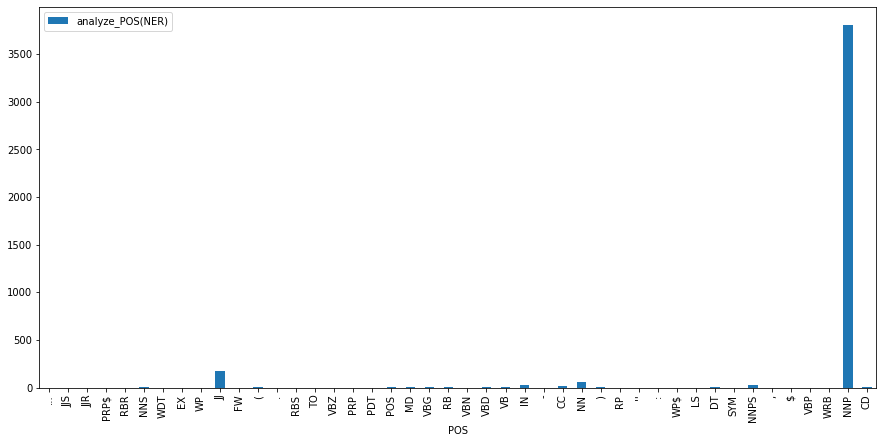

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,7)
agg_result.toPandas().plot.bar(x='POS', y='analyze_POS(NER)')#(style=['rx'])

We notice from the above figure that the majority of recognized entities are nouns (namely NNP) which is a good indicator that the results make a lot of sense. The other entities that were identified as JJ (adjectives) might contains many false positives. 